In [1]:
import preprocessingFuncts as pp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h1>This should be put in preprocessingFuncts.py</h3>


In [2]:
def getOccupationList(path="ml-100k\\u.occupation"):
    occupation_header = ["occupation"]
    rating = pd.read_csv(path,names=occupation_header)
    return rating

<h3>Reading the ratings data</h3>
Returns a pandas data frame with cleaned data from u.data

In [3]:
ratings = pp.readRatingData()
ratings = ratings.sort_values(by=['user_id','item_id']).reset_index().drop('index',axis=1)
ratings

,user_id,item_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3
...,...,...,...
99995,943,1067,2
99996,943,1074,4
99997,943,1188,3
99998,943,1228,3


<h3>Reading the item data</h3>
Returns a pandas data frame with cleaned data from u.item (no title, sry, thought it's not important)

,item_id,title,year,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,675,"Nosferatu (Nosferatu, eine Symphonie des Graue...",1922,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1542,"Scarlet Letter, The (1926)",1926,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,617,"Blue Angel, The (Blaue Engel, Der) (1930)",1930,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,656,M (1931),1931,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,1124,"Farewell to Arms, A (1932)",1932,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1670,Tainted (1998),1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1677,1671,"Further Gesture, A (1996)",1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1678,Mat' i syn (1997),1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1679,1679,B. Monkey (1998),1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


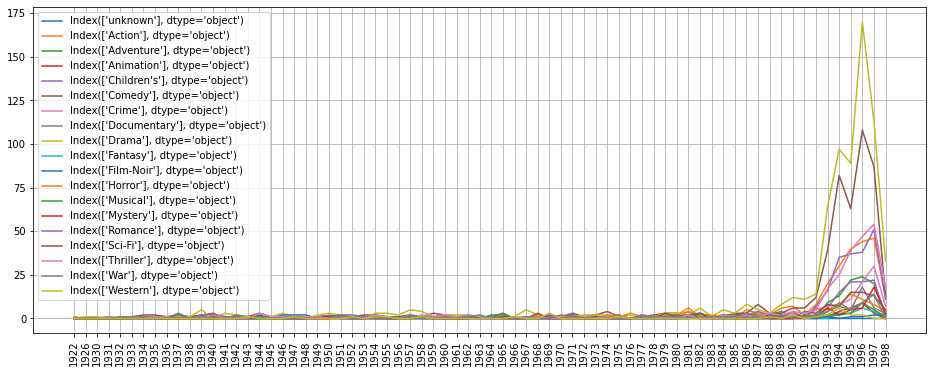

In [4]:
items = pp.readItemData()
items = items.sort_values(by=['year','item_id']).reset_index().drop('index',axis=1)
items = items.dropna()
display(items)

# print(items.columns)
count=0
yearnow=0
for i in range(len(items)):
    if(yearnow!=items['year'][i]):
        count+=1
        yearnow=items['year'][i]

temp2 = items.drop('item_id',axis=1)

plt.figure(figsize=(16,6))
for i in range(2,len(temp2.columns)):
    columnname = temp2.iloc[:,i].name
    temp3 = temp2.loc[:,['year',columnname]]
    temp3 = temp3.groupby(by=['year']).sum()

    plt.title(label=temp3.columns.name,fontsize=40,loc='center')
    plt.plot(temp3.index,temp3.iloc[:,0],label = temp3.columns)
    plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()


<h3>Reading the user data</h3>
Returns a pandas data frame with cleaned data from u.user. Occupation and gender column's contents are now nominal.

In [5]:
users = pp.readUserData()
users = users.sort_values(by=['user_id','age']).reset_index().drop('index',axis=1)
users

,user_id,age,gender,occupation,zip_code,age_category
0,1,24,1,19,85711,3
1,2,53,0,13,94043,6
2,3,23,1,20,32067,3
3,4,24,1,19,43537,3
4,5,33,0,13,15213,4
...,...,...,...,...,...,...
938,939,26,0,18,33319,3
939,940,32,1,0,02215,4
940,941,20,1,18,97229,2
941,942,48,0,10,78209,5


In [8]:
def fuckyou(sim,arr,string):
    a = sim.corr(min_periods=30)
    # print(a[0][0])
    plt.figure(figsize=(20,20))
    plt.set_cmap('jet')
    plt.imshow(a)
    plt.colorbar()
    for i in range(len(a[0])):
        for j in range(len(a[0])):
            plt.text(i,j,str(a[j][i].round(2)),va='center',ha='center')
    tick = arr[string].tolist()
    plt.xticks(range(0,len(tick)),tick,rotation=-90)
    plt.yticks(range(0,len(tick)),tick)

plt.show()

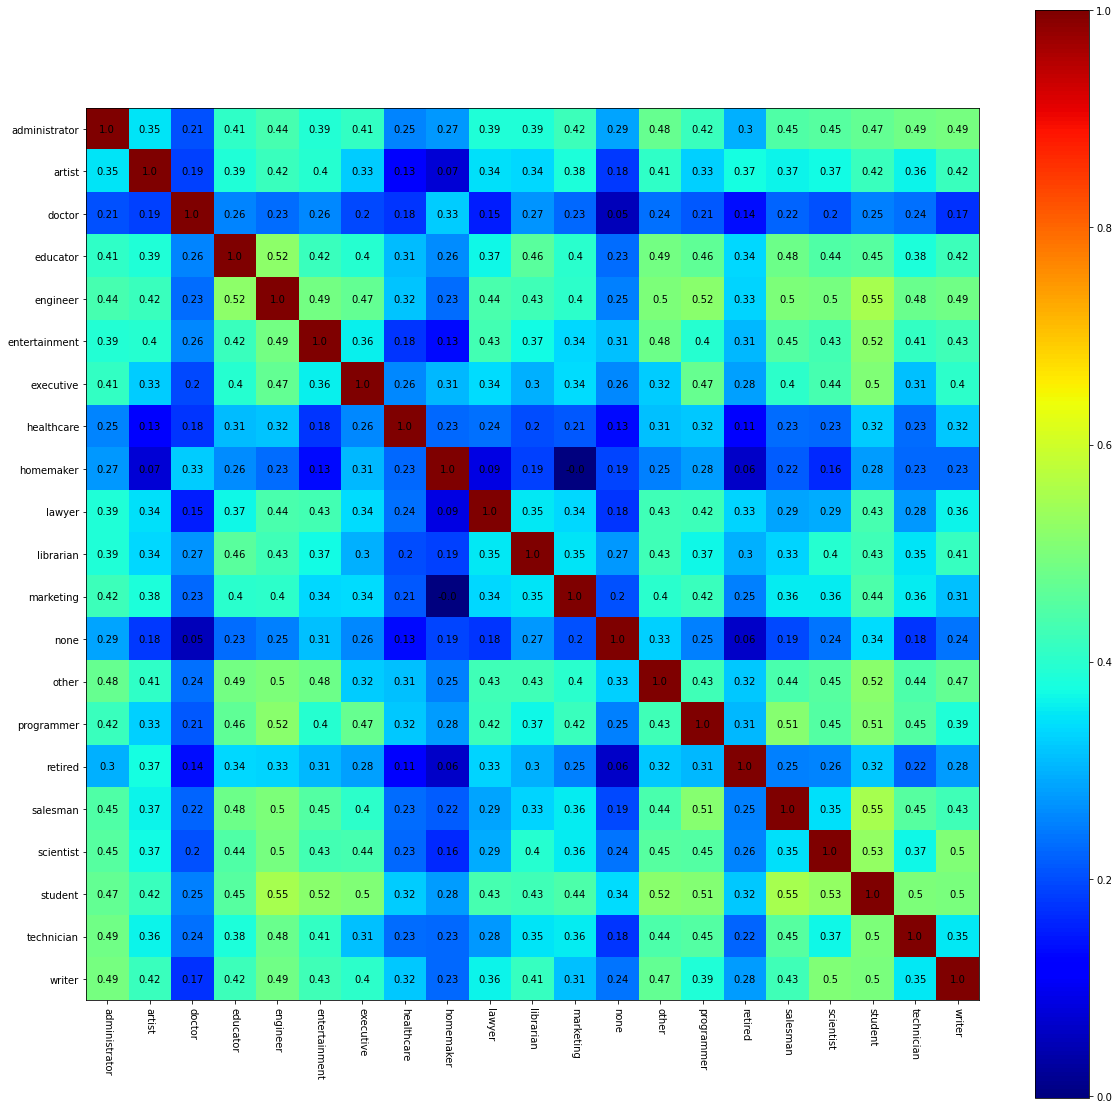

In [9]:
occup = pp.specifyByUserData(users, ratings, ["occupation"])
job = getOccupationList()
occup = occup.drop('user_id',axis=1)
occup = occup.groupby(by=['occupation','item_id']).mean()

sim = occup.pivot_table(columns='occupation',index='item_id',values='rating')
fuckyou(sim,job,'occupation')


<h3>Specifying data to analyze based on user</h3>
Returns a pandas data frame with the user_id, item_id, rating and any specified category from the user attributes. takes input from user data and ratings data

In [ ]:
pp.specifyByUserData(users, ratings, ["gender"])

occup = pp.specifyByUserData(users, ratings, ["occupation"])
job = getOccupationList()
occup = occup.drop('user_id',axis=1)
occup = occup.groupby(by=['occupation','item_id']).mean()

sim = occup.pivot_table(columns='occupation',index='item_id',values='rating')
fuckyou(sim,job,'occupation')

,user_id,gender,item_id,rating
0,1,1,1,5
1,1,1,2,3
2,1,1,3,4
3,1,1,4,3
4,1,1,5,3
...,...,...,...,...
99995,943,1,1067,2
99996,943,1,1074,4
99997,943,1,1188,3
99998,943,1,1228,3


<h3>Specifying data to analyze based on item</h3>
Returns a pandas data frame with the item_id, item_id, rating and any specified category(only between "year" and "genre") from the item attributes, takes input from user data and ratings data

In [ ]:
occup = pp.specifyByItemData(items, ratings, "year")
occup

,item_id,year,user_id,rating
0,675,1922,7,5
1,675,1922,13,5
2,675,1922,21,5
3,675,1922,59,5
4,675,1922,60,4
...,...,...,...,...
99986,1670,1998,782,3
99987,1671,1998,787,1
99988,1678,1998,863,1
99989,1679,1998,863,3
